# Importing Necessary Libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data from CSV Files

In [2]:
customers = pd.read_csv('./data/Customers.csv')
products = pd.read_csv('./data/Products.csv')
transactions = pd.read_csv('./data/Transactions.csv')

# Checking for Missing Values and Duplicates

In [3]:
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

print(customers.duplicated().sum())
print(products.duplicated().sum())
print(transactions.duplicated().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64
0
0
0


# Converting Date Columns to Datetime

In [4]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Displaying DataFrame Information

In [5]:
print(customers.info())
print(products.info())
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column    

# Customer Information and Plots

### Plotting Number of Customers by Region

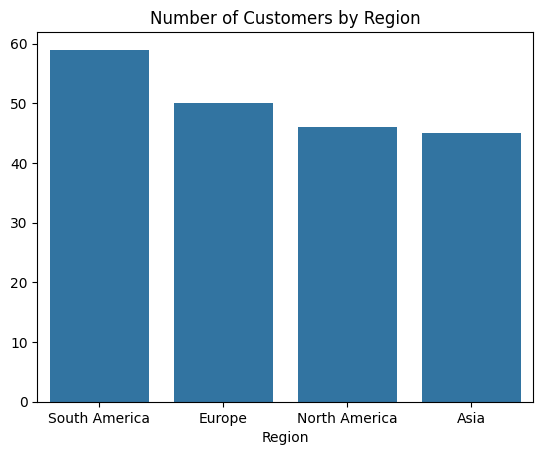

In [6]:
region_counts = customers['Region'].value_counts()
sns.barplot(x=region_counts.index, y=region_counts.values)
plt.title('Number of Customers by Region')
plt.show()

### Plotting Customer Signup Trends

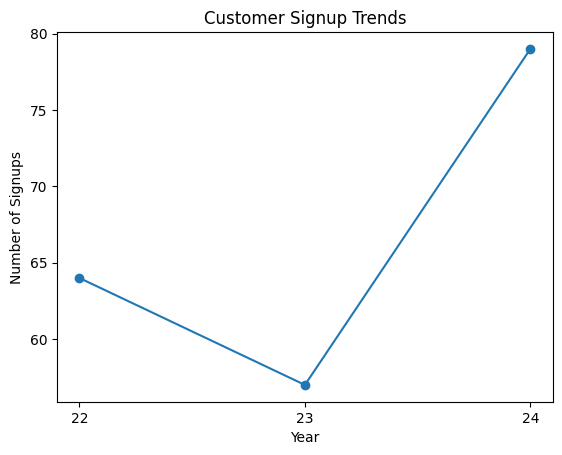

In [7]:
customers['SignupYear'] = customers['SignupDate'].dt.year
signup_trends = customers['SignupYear'].value_counts().sort_index()

# Create the plot
signup_trends.plot(kind='line', marker='o')
plt.title('Customer Signup Trends')
plt.xlabel('Year')
plt.ylabel('Number of Signups')
plt.xticks(signup_trends.index, [str(year)[-2:] for year in signup_trends.index])

plt.show()


# Product Information and Plot

### Plotting Most Popular Product Categories

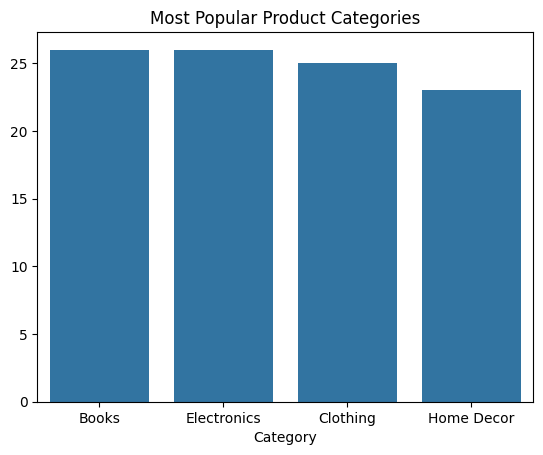

In [8]:
category_counts = products['Category'].value_counts()
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Most Popular Product Categories')
plt.show()

### Plotting Distribution of Product Prices

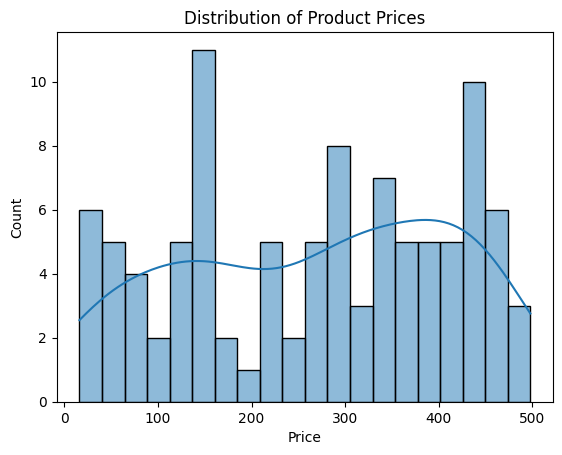

In [9]:
sns.histplot(products['Price'], bins=20, kde=True)
plt.title('Distribution of Product Prices')
plt.show()

### Plotting Product Categories Sold in Each Region

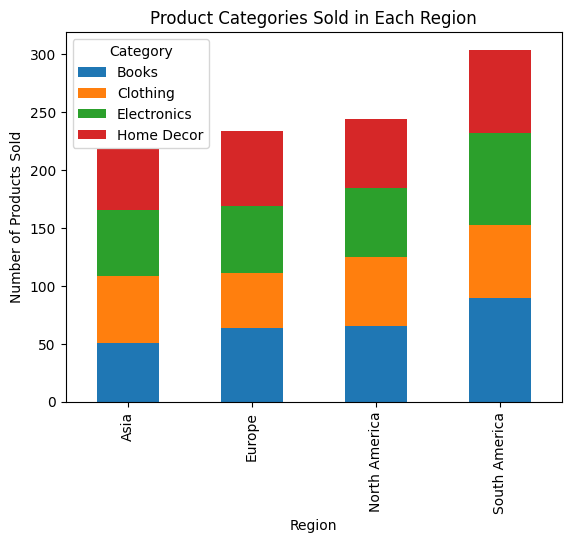

In [10]:
category_region_counts = transactions.merge(products, on='ProductID').merge(customers, on='CustomerID').groupby(['Region', 'Category']).size().unstack()
category_region_counts.plot(kind='bar', stacked=True)
plt.title('Product Categories Sold in Each Region')
plt.xlabel('Region')
plt.ylabel('Number of Products Sold')
plt.show()

# Transactions and Its Plots

### Plotting Monthly Transaction Trends

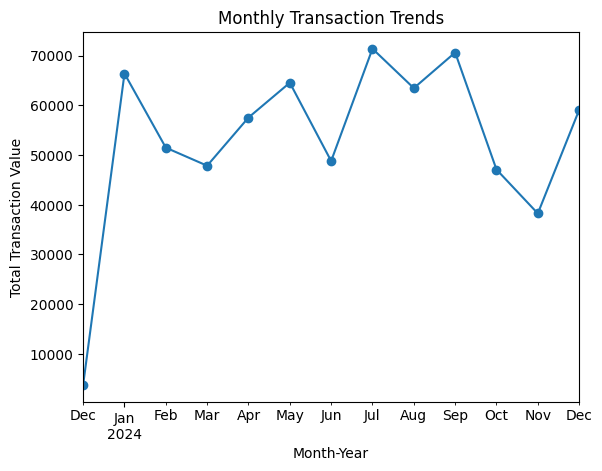

In [11]:
transactions['MonthYear'] = transactions['TransactionDate'].dt.to_period('M')
monthly_trends = transactions.groupby('MonthYear')['TotalValue'].sum()
monthly_trends.plot(kind='line', marker='o')
plt.title('Monthly Transaction Trends')
plt.xlabel('Month-Year')
plt.ylabel('Total Transaction Value')
plt.show()

### Plotting Top 10 Customers by Total Spend

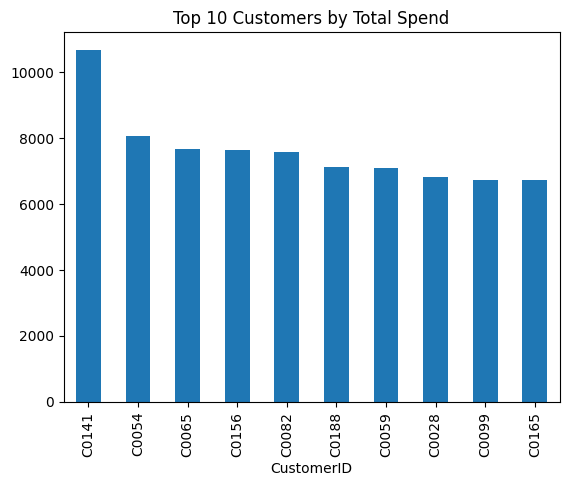

In [12]:
top_customers = transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind='bar')
plt.title('Top 10 Customers by Total Spend')
plt.show()

### Plotting Regions of Top 100 Customers

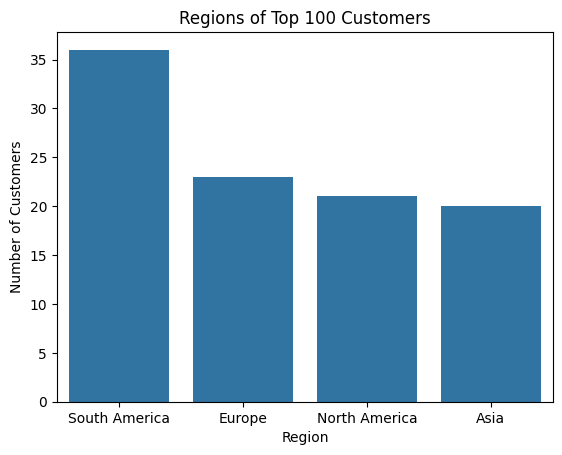

In [13]:
top_100_customers = transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(100).index

top_100_customers_regions = customers[customers['CustomerID'].isin(top_100_customers)]['Region'].value_counts()

sns.barplot(x=top_100_customers_regions.index, y=top_100_customers_regions.values)
plt.title('Regions of Top 100 Customers')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()



# Plotting Product Categories Spend of Top 100 Customers

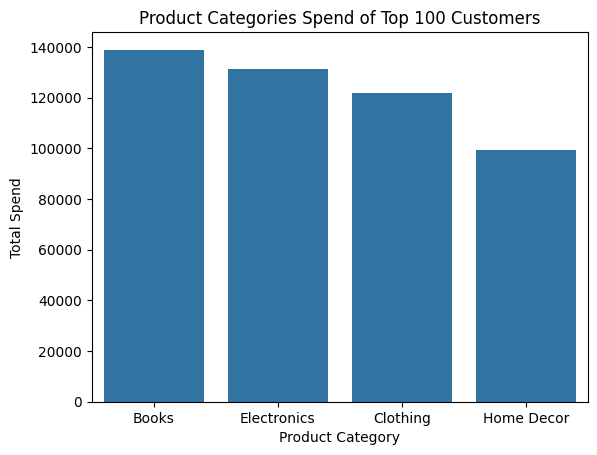

In [14]:
top_100_transactions = transactions[transactions['CustomerID'].isin(top_100_customers)]

top_100_transactions = top_100_transactions.merge(products, on='ProductID')

top_100_product_spend = top_100_transactions.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
sns.barplot(x=top_100_product_spend.index, y=top_100_product_spend.values)
plt.title('Product Categories Spend of Top 100 Customers')
plt.xlabel('Product Category')
plt.ylabel('Total Spend')
plt.show()

# Product correlation matrix

In [ ]:
# Create a pivot table with Product Categories as columns and sum of TotalValue as values
category_sales = transactions.merge(products, on='ProductID').pivot_table(index='CustomerID', columns='Category', values='TotalValue', aggfunc='sum', fill_value=0)

# Calculate the correlation matrix
correlation_matrix = category_sales.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix between Product Types for Sales')
plt.show()

# Business Insights

## Customer Insights
1. **Customer Distribution by Region**:
    - South America has the highest number of customers (59), followed by Europe (50), North America (46), and Asia (45).

2. **Customer Signup Trends**:
    - The number of customer signups has been increasing over the years, with the highest number of signups in 2024 (79).

3. **Top 100 Customers**:
    - The top 100 customers are predominantly from South America (36), followed by Europe (23), North America (21), and Asia (20).

## Product Insights
1. **Popular Product Categories**:
    - The most popular product categories are Books and Electronics, each with 26 products, followed by Clothing (25) and Home Decor (23).

2. **Product Price Distribution**:
    - The prices of products vary widely, with a significant number of products priced between $100 and $400.

3. **Top Product Categories by Spend**:
    - The top 100 customers spend the most on Books ($138,928.97), followed by Electronics ($131,348.05), Clothing ($121,722.95), and Home Decor ($99,538.45).

## Transaction Insights
1. **Monthly Transaction Trends**:
    - The total transaction value fluctuates monthly, with peaks observed in January, July, and September 2024.

2. **Top Customers by Total Spend**:
    - The top 10 customers have a total spend ranging from $6,708.10 to $10,673.87.

3. **Product Categories Sold in Each Region**:
    - South America leads in the number of products sold across all categories, followed by Europe, North America, and Asia.

## Correlation Insights
1. **Category Correlation**:
    - There is a strong positive correlation between the sales of Books and Electronics (0.95), indicating that customers who buy Books are also likely to buy Electronics.
    - Clothing has a weaker correlation with other categories, suggesting it appeals to a different customer segment.
